In [1]:
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings.csv


In [2]:
#A1

import pandas as pd
import numpy as np

df=pd.read_csv("listings.csv")

# Let's assume 'room_type' is the class label
classes = df['room_type'].unique()[:2]  # Take any two classes
features = ['price', 'minimum_nights', 'number_of_reviews']

df_filtered = df[df['room_type'].isin(classes)]
X = df_filtered[features].fillna(0).to_numpy()
y = df_filtered['room_type'].to_numpy()

# Group by class
class1 = X[y == classes[0]]
class2 = X[y == classes[1]]

# Mean vectors (centroids)
centroid1 = np.mean(class1, axis=0)
centroid2 = np.mean(class2, axis=0)

# Spread (std deviation)
spread1 = np.std(class1, axis=0)
spread2 = np.std(class2, axis=0)

# Interclass distance
interclass_distance = np.linalg.norm(centroid1 - centroid2)

print("Centroid 1:", centroid1)
print("Centroid 2:", centroid2)
print("Spread 1:", spread1)
print("Spread 2:", spread2)
print("Interclass Distance:", interclass_distance)

Centroid 1: [90.49944941 27.71118316 29.06815123]
Centroid 2: [193.67018266  30.83478261  25.25665037]
Spread 1: [842.08871223  39.88744986  75.80929408]
Spread 2: [668.32292307  29.13504171  59.21731326]
Interclass Distance: 103.2883566155887


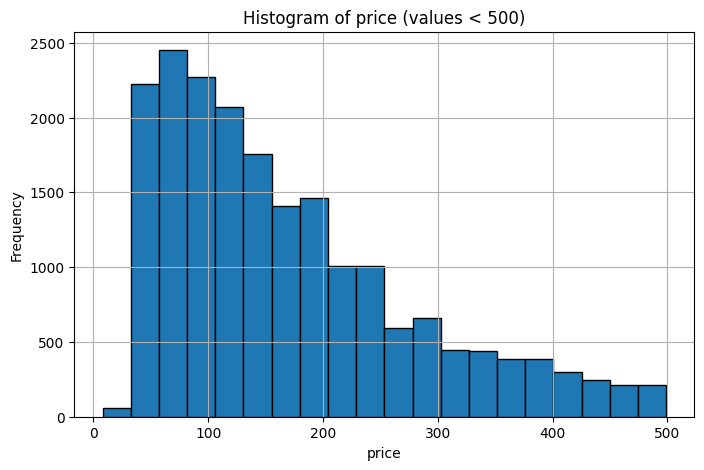

Mean of price (filtered): 170.03613535446334
Variance of price (filtered): 11920.499587412594


In [5]:
# A2

import matplotlib.pyplot as plt

feature = 'price'
data = df[feature].dropna()
filtered_data = data[data < 500]  # Adjusting cutoff

# Using numpy.histogram with appropriate bin range
hist, bin_edges = np.histogram(filtered_data, bins=20, range=(filtered_data.min(), filtered_data.max()))

# Plot histogram
plt.figure(figsize=(8,5))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor="black", align="edge")
plt.title(f"Histogram of {feature} (values < 500)")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Calculate statistics
mean_val = np.mean(filtered_data)
variance_val = np.var(filtered_data)

print(f"Mean of {feature} (filtered): {mean_val}")
print(f"Variance of {feature} (filtered): {variance_val}")

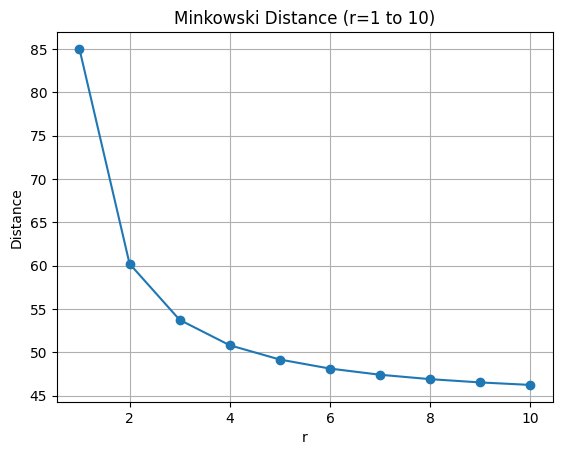

In [6]:
# A3

from scipy.spatial.distance import minkowski

vec1 = X[0]
vec2 = X[1]
r_values = list(range(1, 11))
distances = [minkowski(vec1, vec2, p=r) for r in r_values]

plt.plot(r_values, distances, marker='o')
plt.title("Minkowski Distance (r=1 to 10)")
plt.xlabel("r")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [8]:
# A4

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [9]:
# A5

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# A6

accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.664089427107592


In [13]:
# A7

predictions = knn.predict(X_test)
print("Predictions:", predictions)

# Predict on one vector
print("Sample prediction:", knn.predict([X_test[10]]))

Predictions: ['Private room' 'Entire home/apt' 'Private room' ... 'Entire home/apt'
 'Entire home/apt' 'Private room']
Sample prediction: ['Entire home/apt']


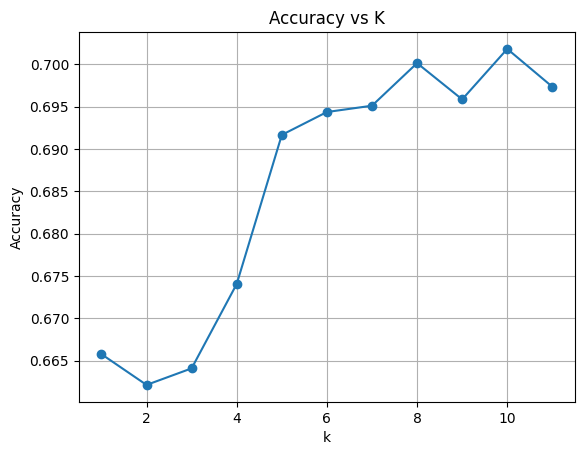

In [14]:
# A8

accuracies = []

for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

plt.plot(range(1, 12), accuracies, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [16]:
# A9

from sklearn.metrics import confusion_matrix, classification_report
y_pred = knn.predict(X_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# Classification report (precision, recall, F1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report) # its overfitting model because it performs well on training data but not on test data

Confusion Matrix:
 [[4271 1560]
 [1689 3215]]
Classification Report:
                  precision    recall  f1-score   support

Entire home/apt       0.72      0.73      0.72      5831
   Private room       0.67      0.66      0.66      4904

       accuracy                           0.70     10735
      macro avg       0.69      0.69      0.69     10735
   weighted avg       0.70      0.70      0.70     10735

